In [1]:
import mesa
from mesa import Agent,Model
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.batchrunner import BatchRunner
import networkx as nx
import numpy as np
import pylab as plt
from matplotlib import pyplot
import time,enum,math
np.set_printoptions(suppress= True)
import scipy.integrate
import random
from scipy.interpolate import make_interp_spline

In [142]:
import pandas as pd

In [1]:
def make_graph(no,d):
    GG2 = []
#     no = 1024
    C = int(np.sqrt(no))
    num_nodes = int(no/C)
    degree =d-1
    for i in range(C):
            GG2.append(nx.random_regular_graph(d =degree,n = num_nodes))
    k = 0
    for k in range(C):
        g = GG2[k]
        ii = 1+k*C
        mappi = {}
        keys = range(C)
        lis = []
        for l in range(C):
            lis.append((l)+ii)
        mappi = dict(list(enumerate(lis)))
        nx.relabel_nodes(G =g, mapping=mappi, copy=False)
    G3  = nx.union_all(GG2)
    for mn in range(C):
        lis = []
        for l in range(C):
            f = (l)+(mn*C)+1
            if G3.degree()[f] <d:
                lis.append((l)+(mn*C)+1)   
        sel =  [x for x in range(1,no+1) if (x not in lis and G3.degree()[x] < d) ]   
        for ll in lis:
            if len(sel) > 0:
                rs = np.random.choice(sel)
                G3.add_edge(ll,rs)
    return G3,GG2

In [357]:
# g = nx.random_regular_graph(d = 3,n = 10000)
# fig,ax=plt.subplots(1,1,figsize=(16,10))
# f=plot_grid1(fig,g,layout='circular')
# l=list(nx.maximal_matching(g))
# len(l)

In [2]:
print(g.degree())
print(g.edges())
lis = random.choice(list(g.edges))
g.remove_edge(*lis)
print(g.degree())

NameError: name 'g' is not defined

In [3]:
def make_graph1(no,d,kappa,c):
    GG2 = []
    v = 0
#     no = 1024
    C = c#int(np.sqrt(no))
    num_nodes = int(no/C)
    degree =d
    for i in range(C):
            GG2.append(nx.random_regular_graph(d =degree,n = num_nodes))
    k = 0
    cnt = 0
    for k in range(C):
        g = GG2[k]
        ii = 1+k*len(g)# k = 0,1,2
        mappi = {}
        keys = range(C)
        lis = []
        for l in range(len(g)):
            lis.append((l)+ii)
        mappi = dict(list(enumerate(lis)))
        nx.relabel_nodes(G =g, mapping=mappi, copy=False)
    G3  = nx.union_all(GG2)
    
    make_connections(GG2,G3,kappa)
    
    
    
    
    
#     for kk in range(int(np.ceil(kappa/2))):
#         get_nodes(GG2,G3,d,kappa)
#     for mn in range(C):
#         current_g = GG2[mn]
#         ll =  curr_lis(GG2,current_g,G3,d)
#         if len(ll) == 0:
#             exception1(G3,current_g,d)
#             ll = curr_lis(GG2,current_g,G3,d)
#         nn = get_glist(GG2,current_g,G3,d)
#         for kk in range(kappa):
#             try:
#                 n1 = np.random.choice(ll)
#                 n2 = np.random.choice(nn)
#                 ll.remove(n1)
#                 nn.remove(n2)
# #                 print(n1,n2)
#                 G3.add_edge(n1,n2)
#                 cnt = cnt+1
#             except:
#                 pass
    return G3,GG2





# def get_nodes(GG,G,d,kappa):
#     for g in GG:
#         for e in list(g.edges()):
#             if G.degree[e[0]] == d and G.degree[e[1]] == d:
#                 G.remove_edge(*e)
#                 g.remove_edge(*e)
#                 break
# def exception1(G,g,d):
#     for e in list(g.edges()):
#         if G.degree[e[0]] == d and G.degree[e[1]] == d:
#             G.remove_edge(*e)
#             g.remove_edge(*e)
#             break
            
# def curr_lis(GG,curr,G,d):
#     l = []
#     for n in list(curr.nodes):
#         if G.degree[n] < d:
#             l.append(n)
#     return l
        
# def get_glist(GG,curr,G,d):
#     sel = []
#     for g in GG:
#         if g != curr:
#             for n in list(g.nodes):
#                 if G.degree[n] < d:
#                     sel.append(n)

#     return sel



def plot_grid1(fig,g1,layout='spring'):
    graph = g1
    if layout == 'kamada-kawai':      
        pos = nx.kamada_kawai_layout(graph)  
    elif layout == 'circular':
        pos = nx.circular_layout(graph)
    else:
        pos = nx.spring_layout(graph, iterations=5, seed=8)  
    plt.clf()
    ax=fig.add_subplot()

    nx.draw(graph, pos, node_size=100, edge_color='gray', node_color="green", #with_labels=True,
            alpha=0.9,font_size=14,ax=ax)
#     ax.set_title(title)
    return

#example usage


In [4]:
def make_connections(clusters,G,kappa):
    maximal_matlis = []
    lis_connections = []
    for evry_clust in clusters:
        maximal_matlis.append(list(nx.maximal_matching(evry_clust)))
        
#     for c in clusters:
#         l1 = list(c.edges())
#         l2 = []
#         for k3 in range(int(np.ceil(kappa/2))):
#             x = (l1[k3][0])
#             y = (l1[k3][1])
#             print(x,type(x))
#             l2.append(x)
#             l2.append(y)
#         lis_connections.append(l2)  
            
            
    min1 = len(maximal_matlis[0])
    for m in maximal_matlis:
        if len(m)<min1:
            min1 = len(m)
    print(min1)
    for k1 in range(kappa):
        e10 = maximal_matlis[0][k1]
        e11 = maximal_matlis[1][k1]
        G.remove_edge(*e10)
        G.remove_edge(*e11)
        G.add_edge(e10[0],e11[0])
#         print(e10[0],e11[0])
        for k2 in range(1,len(clusters)-1):
            e1 = maximal_matlis[k2][k1]
            e2 = maximal_matlis[k2+1][k1]
#             try:
#                 G.remove_edge(*e1)
#             except: pass
            G.remove_edge(*e2)
            G.add_edge(e1[1],e2[0])
#             print(e1[1],e2[0])
        G.add_edge(e2[1],e10[1])
#         print(e2[1],e10[1])
#     for k1 in range(kappa):
#         print(k1)
#         e10 = lis_connections[0][k1]
#         e11 = lis_connections[1][k1]
#         G.remove_edge(*e10)
#         G.remove_edge(*e11)
#         G.add_edge(e10[0],e11[0])
# #         print(e10[0],e11[0])
#         for k2 in range(1,len(clusters)-1):
#             e1 = lis_connections[k2][k1]
#             e2 = lis_connections[k2+1][k1]
# #             try:
# #                 G.remove_edge(*e1)
# #             except: pass
#             G.remove_edge(e2)
#             G.add_edge(e1[1],e2[0])
# #             print(e1[1],e2[0])
#         G.add_edge(e2[1],e10[1])
#         print(e2[1],e10[1])
        
            
            
        

In [4]:
# g1,g2  = make_graph1(36,3,0,6)
# fig,ax=plt.subplots(1,1,figsize=(16,10))
# f=plot_grid1(fig,g1,layout='circular')
# df.iloc[1][0]

n1 = 10000
n2 = 2000
lis11 =[]
lis22 = []
for k3 in range(0,20,1):
    lis11.append(n1-k3-n2)
    lis22.append(n1-k3)
# print(lis11,lis22)
    
def multiplyList(myList) :
     
    # Multiply elements one by one
    result = 1
    for x in myList:
         result = result * x
    return result
p1 =  multiplyList(lis11)
p2 =  multiplyList(lis22)
print((p1/p2)*500)

5.737250644412709


In [25]:
no_clust = 500
g1,g2 = make_graph1(10000,3,0,no_clust)
model = Disease_spread1(10000,g1,3,1)
clust_1 = np.zeros(len(g2))
initial_seeds1 = np.zeros(len(g2))
for k1 in range(len(g2)):
    clust_1[k1] = k1
    count = 0
    for k2 in g2[k1]:
        for agents in model.schedule.agents:
            if agents.unique_id == k2:
                if agents.condition == '1':
                    count = count +1
    initial_seeds1[k1] = initial_seeds1[k1]+count
print(initial_seeds1)

7
[1. 3. 4. 4. 4. 0. 1. 1. 1. 3. 2. 4. 1. 1. 2. 4. 1. 0. 2. 1. 0. 1. 1. 1.
 2. 2. 8. 1. 3. 2. 0. 4. 2. 2. 0. 2. 2. 2. 2. 1. 5. 5. 3. 2. 3. 3. 2. 3.
 3. 3. 2. 0. 6. 3. 4. 0. 2. 2. 2. 1. 0. 2. 0. 2. 7. 4. 1. 4. 2. 3. 5. 3.
 3. 3. 2. 2. 5. 2. 2. 1. 4. 4. 1. 3. 0. 3. 1. 0. 2. 1. 1. 2. 1. 2. 2. 1.
 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 4. 0. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.
 4. 3. 1. 3. 1. 1. 1. 2. 4. 2. 1. 2. 0. 2. 0. 3. 1. 0. 2. 3. 2. 3. 4. 4.
 0. 2. 0. 2. 3. 5. 1. 2. 2. 0. 1. 0. 0. 2. 2. 3. 4. 2. 5. 3. 2. 2. 3. 1.
 2. 2. 3. 1. 2. 1. 0. 1. 3. 3. 2. 2. 7. 3. 4. 0. 2. 3. 2. 3. 1. 2. 2. 1.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 1. 1. 2. 3. 2. 1. 1. 2. 5. 3. 3. 2. 0. 1. 1.
 2. 2. 1. 2. 0. 0. 1. 2. 4. 0. 2. 1. 3. 0. 0. 2. 3. 3. 1. 2. 4. 1. 3. 2.
 3. 1. 6. 0. 0. 2. 1. 2. 2. 0. 2. 3. 0. 2. 4. 1. 2. 1. 0. 2. 3. 0. 2. 2.
 1. 1. 3. 1. 6. 3. 0. 2. 3. 1. 2. 3. 2. 1. 4. 2. 0. 1. 3. 1. 1. 1. 2. 2.
 2. 3. 1. 1. 1. 1. 1. 2. 0. 3. 3. 3. 1. 4. 1. 1. 6. 1. 3. 4. 4. 1. 2. 0.
 2. 1. 2. 1. 2. 2. 1. 1. 3. 0. 1. 1. 1. 1. 1. 2. 

In [28]:
c = 0
for i in range(len(initial_seeds1)):
    if initial_seeds1[i] == 0:
        c =c + 1
print(c)

59


In [428]:
no_clust = 100
g1,g2 = make_graph1(10000,3,0,no_clust)
clust_1 = np.zeros(len(g2))
# recovered = np.zeros(len(g2))
initial_seeds1 = np.zeros(len(g2))
for k in range(10):
    model = Disease_spread1(10000,g1,3,1)
#     for x in range(70):
#         model.step()
    for k1 in range(len(g2)):
        clust_1[k1] = k1
        count = 0
        for k2 in g2[k1]:
            for agents in model.schedule.agents:
                if agents.unique_id == k2:
                    if agents.condition == '1':
                        count = count +1
        initial_seeds1[k1] = initial_seeds1[k1]+count
#         recovered[k1] = recovered[k1]+count

# initial_seeds/10
# recovered/10       

    
    

40


999.9999999999998
2.0


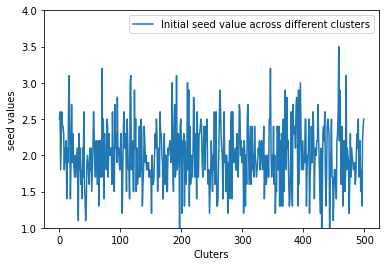

In [404]:
plt.plot(initial_seeds/10,label = 'Initial seed value across different clusters')
plt.xlabel('Cluters')
plt.ylabel('seed values')
plt.ylim(1,4)
plt.legend()
print(sum(initial_seeds/10))
print((initial_seeds/10).mean())

In [458]:
np.count_nonzero(initial_seeds/10)

500

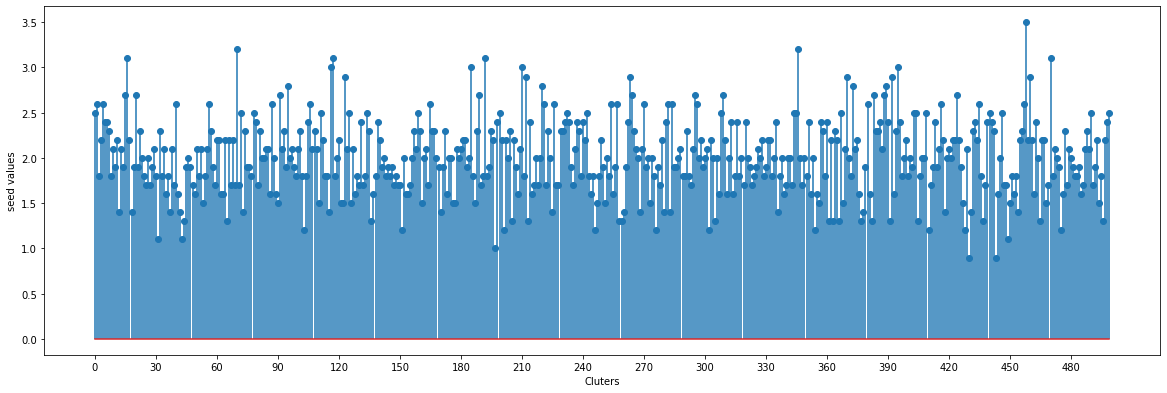

In [466]:
# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = (20,5.5)
fig = plt.figure()
x = clust_
y = initial_seeds/10
plt.stem(x,y)
# plt.xlabel("$\bf{y=e^{x}}$")
plt.xticks(np.arange(min(x), max(x)+1, 30))
spacing = 0.0001
fig.subplots_adjust(bottom=spacing)

plt.xlabel('Cluters')
plt.ylabel('seed values')
plt.show()









# # ys = X.pmf( xs )          # compute the shape of the distribution
# plt.plot( clust_, (recovered/10), 'o' )   # plot circles...
# plt.vlines( clust_, 0, (recovered/10))   # ...and lines
# plt.ylim( bottom=0 )  


8179.4
16.3588


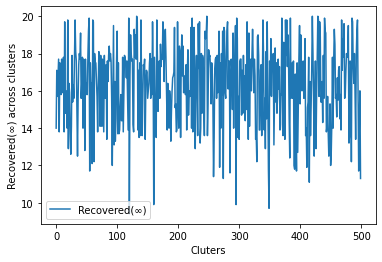

In [399]:
plt.plot(recovered/10,label='Recovered(∞)')
plt.xlabel('Cluters')
plt.ylabel('Recovered(∞) across clusters')
plt.legend()
print(sum(recovered/10))
print((recovered/10).mean())

In [354]:
rec_max = []
for l in range(len(df)):
    tuplee = df.iloc[l]
    g1,g2 = make_graph1(20000,3,int(tuplee[1]),int(tuplee[0]))#no,d,kappa,c
    suseptible = np.zeros(40)
    active_cases = np.zeros(40)
    immunized_cases = np.zeros(40)
    daily_new = np.zeros(40)
    for k in range(3):
        model = Disease_spread1(20000,g1,3,1)
        for i in range(40):
#             count1 = 0
            count2 = 0
#             count3 = 0
#             count4 = 0
            for agents in model.schedule.agents:
#                 if agents.condition == '1':
#                     count1 = count1+1
                if agents.condition == '5':
                    count2 = count2 + 1
#                 if agents.new == 1:
#                     count3 = count3+1
#                 if agents.condition == '0':
#                     count4 = count4+1
#             active_cases[i] = active_cases[i] +count1
            immunized_cases[i] = immunized_cases[i] +count2
#             suseptible[i] = suseptible[i]+count4
#             if i > 0:
#                 daily_new[i] = suseptible[i-1] - suseptible[i]
            model.step()
#     active_cases = active_cases/3
    immunized_cases = immunized_cases/3
#     suseptible = suseptible/3
#     daily_new = daily_new/3
    rec_max.append((immunized_cases/20000).max())

#     fig, ax = plt.subplots(figsize = (8,5))
#     plt.title('Disease Spread Dynamics')
#     pyplot.plot(suseptible/10000,'b',label = 'Suseptible: S(t)')
#     pyplot.plot(active_cases/10000,'r',label ='active_cases: I(t)')
#     pyplot.plot(immunized_cases/10000,'g',label = 'removed/recovered: R(t)')
#     pyplot.xlabel('days')
#     pyplot.ylabel('proportion of population')

{(5, 3),
 (6, 4),
 (7, 8),
 (9, 10),
 (11, 12),
 (13, 14),
 (15, 16),
 (17, 18),
 (19, 20),
 (21, 23),
 (22, 24),
 (25, 26),
 (27, 30),
 (28, 29),
 (31, 33),
 (32, 35),
 (34, 36)}

In [24]:
class agent_(Agent):
    def __init__(self,unique_id,model):
        super().__init__(unique_id,model)
        self.condition = "0"
        self.day = 0
        self.new = 0
        
    def move(self):
        possible_neighbour = []
        neigh = self.model.grid.get_neighbors(self.pos,include_center =False)
        for n in neigh:
            if self.model.grid.is_cell_empty(n):
                possible_neighbour.append(n)
                
        if len(possible_neighbour)>0:
            new_pos = self.random.choice(possible_neighbour)
            self.model.grid.move_agent(self,new_pos)
    def h_status(self):
        
        if self.condition == "1" and self.new == 0:
            self.day = self.day + 1
            if self.day == self.model.rec_day:
                self.condition = "5"
        if self.condition == '1' and self.new == 1:
            self.new = 0
                
    def contact(self):
        if self.condition =="1":
            if model.t == 0:
                neighbours = self.model.grid.get_neighbors(self.pos,include_center = False)
            else:
                neighbour = model.G.edges(self.unique_id)
                neighbour = list(neighbour)
                neighbours = []
                for x in range(len(neighbour)):
                    neighbours.append(neighbour[x][1])
            Suseptible = []
            for a in self.model.grid.get_cell_list_contents(neighbours):
                if a.condition == "0":
                    Suseptible.append(a)
            for a1 in Suseptible:
                if self.random.random()< 0.4:
                    a1.condition = "1"
                    a1.new = 1
    def step(self):
        self.h_status()
        self.contact()
class Disease_spread(Model):
    def __init__(self,N,rec_day,t):
        self.num_agents = N
        self.rec_day = rec_day
        self.degree = 3
        self.t = t
        self.G = nx.random_regular_graph(d =self.degree,n = self.num_agents)
        self.grid = NetworkGrid(self.G)
        self.schedule = RandomActivation(self)
        n =  self.num_agents//10
        seed = np.random.choice(range(self.num_agents),n,replace = False)
        for i,Node1 in enumerate(self.G.nodes()):
            a = agent_(i,self)
            self.schedule.add(a)
            if a.unique_id in seed:
                a.condition = "1"
            self.grid.place_agent(a,Node1)
    def step(self):
        self.schedule.step()
        
class Disease_spread1(Model):
    def __init__(self,N,g,rec_day,t):
        self.num_agents = N
        self.num_nodes = N
        self.rec_day = rec_day
        self.t = t
        self.G = g
        self.grid = NetworkGrid(self.G)
        self.schedule = RandomActivation(self)
        n =  self.num_agents//10
        seed = np.random.choice(range(1,self.num_agents),n,replace = False)
#         print(seed)
        for i,Node1 in enumerate(self.G.nodes()):
            a = agent_(i+1,self)
            self.schedule.add(a)
            if a.unique_id in seed:
                a.condition = "1"
            self.grid.place_agent(a,Node1)
    def step(self):
        self.schedule.step()

In [ ]:
suseptible = np.zeros(35)
active_cases = np.zeros(35)
immunized_cases = np.zeros(35)
daily_new = np.zeros(35)
for gavg in range(10):
    G = make_graph(10000,3,1)
    for k in range(20):
        model = Disease_spread1(10000,G,3,0)
        for i in range(35):
            count1 = 0
            count2 = 0
            count3 = 0
            count4 = 0
            for agents in model.schedule.agents:
                if agents.condition == '1':
                    count1 = count1+1
                if agents.condition == '5':
                    count2 = count2 + 1
                if agents.new == 1:
                    count3 = count3+1
                if agents.condition == '0':
                    count4 = count4+1
            active_cases[i] = active_cases[i] +count1
            immunized_cases[i] = immunized_cases[i] +count2
            suseptible[i] = suseptible[i]+count4
            if i > 0:
                daily_new[i] = suseptible[i-1] - suseptible[i]
            model.step()
active_cases = active_cases/200
immunized_cases = immunized_cases/200
suseptible = suseptible/200
daily_new = daily_new/200
fig, ax = plt.subplots(figsize = (8,5))
plt.title('Disease Spread Dynamics')
pyplot.plot(suseptible/10000,'b',label = 'Suseptible: S(t)')
pyplot.plot(active_cases/10000,'r',label ='active_cases: I(t)')
pyplot.plot(immunized_cases/10000,'g',label = 'removed/recovered: R(t)')
pyplot.legend()      

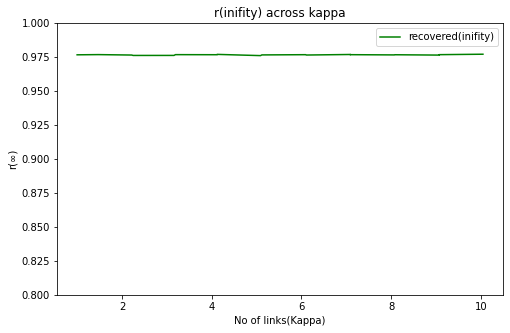

In [5]:
r_infi = []
cntt = []
for kappa in range(1,20,1):
    suseptible = np.zeros(35)
    active_cases = np.zeros(35)
    immunized_cases = np.zeros(35)
    daily_new = np.zeros(35)
    cnt1 = 0
    for gavg in range(5):
        g1,g2 = make_graph1(10000,3,2,3)
        cnt1 = cnt1+cnt
        for k in range(20):
            model = Disease_spread1(10000,G,3,0)
            for i in range(35):
                count1 = 0
                count2 = 0
                count3 = 0
                count4 = 0
                for agents in model.schedule.agents:
                    if agents.condition == '1':
                        count1 = count1+1
                    if agents.condition == '5':
                        count2 = count2 + 1
                    if agents.new == 1:
                        count3 = count3+1
                    if agents.condition == '0':
                        count4 = count4+1
                active_cases[i] = active_cases[i] +count1
                immunized_cases[i] = immunized_cases[i] +count2
                suseptible[i] = suseptible[i]+count4
                if i > 0:
                    daily_new[i] = suseptible[i-1] - suseptible[i]
                model.step()
    active_cases = active_cases/100
    immunized_cases = immunized_cases/100
    suseptible = suseptible/100
    daily_new = daily_new/100
    r_infi.append(immunized_cases[-1])
    cntt.append(cnt1/5)
fig, ax = plt.subplots(figsize = (8,5))
plt.title('r(inifity) across kappa')
pyplot.plot(np.array(cntt)/100,np.array(r_infi)/10000,'g',label = 'recovered(inifity)')
# pyplot.plot(suseptible/10000,'b',label = 'Suseptible: S(t)')
# pyplot.plot(active_cases/10000,'r',label ='active_cases: I(t)')
# pyplot.plot(immunized_cases/10000,'g',label = 'removed/recovered: R(t)')
plt.ylim(0.8, 1)
plt.xlabel('No of links(Kappa)')
plt.ylabel('r(∞)')
pyplot.legend()      

<IPython.core.display.Javascript object>


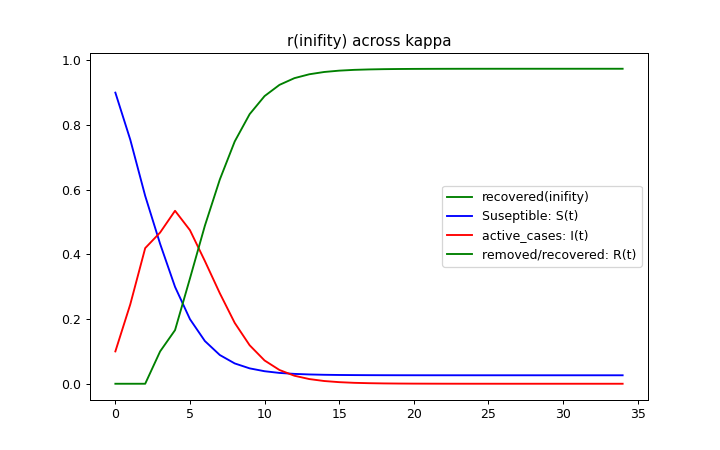

[9738.21]

In [368]:
r_infi1 = []
cntt1 = []
for kappa in range(2,10,2):
    suseptible = np.zeros(35)
    active_cases = np.zeros(35)
    immunized_cases = np.zeros(35)
    daily_new = np.zeros(35)
    cnt1 = 0
    for gavg in range(5):
        G,cnt = make_graph(10000,3,kappa)
        cnt1 = cnt1+cnt
        for k in range(20):
            model = Disease_spread1(10000,G,3,1)
            for i in range(35):
                count1 = 0
                count2 = 0
                count3 = 0
                count4 = 0
                for agents in model.schedule.agents:
                    if agents.condition == '1':
                        count1 = count1+1
                    if agents.condition == '5':
                        count2 = count2 + 1
                    if agents.new == 1:
                        count3 = count3+1
                    if agents.condition == '0':
                        count4 = count4+1
                active_cases[i] = active_cases[i] +count1
                immunized_cases[i] = immunized_cases[i] +count2
                suseptible[i] = suseptible[i]+count4
                if i > 0:
                    daily_new[i] = suseptible[i-1] - suseptible[i]
                model.step()
    active_cases = active_cases/100
    immunized_cases = immunized_cases/100
    suseptible = suseptible/100
    daily_new = daily_new/100
    r_infi1.append(immunized_cases[-1])
#     cntt1.append(cnt1/5)
fig, ax = plt.subplots(figsize = (8,5))
plt.title('r(inifity) across kappa')
pyplot.plot(cntt1,np.array(r_infi1)/10000,'g',label = 'recovered(inifity)')
pyplot.plot(suseptible/10000,'b',label = 'Suseptible: S(t)')
pyplot.plot(active_cases/10000,'r',label ='active_cases: I(t)')
pyplot.plot(immunized_cases/10000,'g',label = 'removed/recovered: R(t)')
pyplot.legend()      
r_infi1

In [340]:
cluster_size = [100,125,200,250,500,625,1000]
kappa = [2,4,6,8,10]
tupl = [(i, j) for i in cluster_size for j in kappa]
df = pd.DataFrame(data = tupl,columns = ['Cluster_sizes','kappa'],dtype ='int')
# r = np.zeros(len(df))
# df['Recovered(∞)'] = r

In [345]:
df

,Cluster_sizes,kappa
0,100,2
1,100,4
2,100,6
3,100,8
4,100,10
5,125,2
6,125,4
7,125,6
8,125,8
9,125,10


In [344]:
# d1 =df[df['Cluster_sizes'] == 1000]
# idx = list(d1[d1['kappa']>6].index)
df.drop(idx,axis = 0,inplace = True)

In [343]:
idx

[33, 34]

In [346]:
rec_max = []
for l in range(len(df)):
    tuplee = df.iloc[l]
    g1,g2 = make_graph1(20000,3,int(tuplee[1]),int(tuplee[0]))#no,d,kappa,c
    suseptible = np.zeros(40)
    active_cases = np.zeros(40)
    immunized_cases = np.zeros(40)
    daily_new = np.zeros(40)
    for k in range(3):
        model = Disease_spread1(20000,g1,3,1)
        for i in range(40):
#             count1 = 0
            count2 = 0
#             count3 = 0
#             count4 = 0
            for agents in model.schedule.agents:
#                 if agents.condition == '1':
#                     count1 = count1+1
                if agents.condition == '5':
                    count2 = count2 + 1
#                 if agents.new == 1:
#                     count3 = count3+1
#                 if agents.condition == '0':
#                     count4 = count4+1
#             active_cases[i] = active_cases[i] +count1
            immunized_cases[i] = immunized_cases[i] +count2
#             suseptible[i] = suseptible[i]+count4
#             if i > 0:
#                 daily_new[i] = suseptible[i-1] - suseptible[i]
            model.step()
#     active_cases = active_cases/3
    immunized_cases = immunized_cases/3
#     suseptible = suseptible/3
#     daily_new = daily_new/3
    rec_max.append((immunized_cases/20000).max())

#     fig, ax = plt.subplots(figsize = (8,5))
#     plt.title('Disease Spread Dynamics')
#     pyplot.plot(suseptible/10000,'b',label = 'Suseptible: S(t)')
#     pyplot.plot(active_cases/10000,'r',label ='active_cases: I(t)')
#     pyplot.plot(immunized_cases/10000,'g',label = 'removed/recovered: R(t)')
#     pyplot.xlabel('days')
#     pyplot.ylabel('proportion of population')

83
83
82
82
83
65
65
64
65
65
39
39
40
39
40
32
32
32
31
32
15
14
15
15
15
12
11
11
12
11
7
7
7


In [347]:
df['Recovered(∞)'] = rec_max
df

,Cluster_sizes,kappa,Recovered(∞)
0,100,2,0.977883
1,100,4,0.978000
2,100,6,0.978517
3,100,8,0.978450
4,100,10,0.977750
5,125,2,0.975717
6,125,4,0.977400
7,125,6,0.975867
8,125,8,0.977100
9,125,10,0.976583


In [356]:
df.to_excel('s11.xlsx')


7


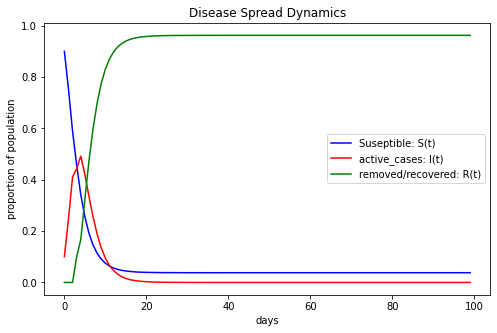

In [372]:
g11,g21 = make_graph1(10000,3,2,no_clust)
suseptible = np.zeros(100)
active_cases = np.zeros(100)
immunized_cases = np.zeros(100)
daily_new = np.zeros(100)
for k in range(30):
    model = Disease_spread1(10000,g11,3,1)
    for i in range(100):
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        for agents in model.schedule.agents:
            if agents.condition == '1':
                count1 = count1+1
            if agents.condition == '5':
                count2 = count2 + 1
            if agents.new == 1:
                count3 = count3+1
            if agents.condition == '0':
                count4 = count4+1
        active_cases[i] = active_cases[i] +count1
        immunized_cases[i] = immunized_cases[i] +count2
        suseptible[i] = suseptible[i]+count4
        if i > 0:
            daily_new[i] = suseptible[i-1] - suseptible[i]
        model.step()
active_cases = active_cases/30
immunized_cases = immunized_cases/30
suseptible = suseptible/30
daily_new = daily_new/30
fig, ax = plt.subplots(figsize = (8,5))
plt.title('Disease Spread Dynamics')
pyplot.plot(suseptible/10000,'b',label = 'Suseptible: S(t)')
pyplot.plot(active_cases/10000,'r',label ='active_cases: I(t)')
pyplot.plot(immunized_cases/10000,'g',label = 'removed/recovered: R(t)')
pyplot.xlabel('days')
pyplot.ylabel('proportion of population')

# pyplot.plot(daily_new,'y',label = 'daily_new')
pyplot.legend()
# pyplot.plot(lin,'r+')        

In [373]:
(immunized_cases/10000)

array([0.        , 0.        , 0.        , 0.1       , 0.16652667,
       0.3236    , 0.47342   , 0.59873   , 0.69940667, 0.77507667,
       0.83051   , 0.86999   , 0.89757333, 0.91702667, 0.93036667,
       0.93976333, 0.94638333, 0.95087667, 0.95402667, 0.95621333,
       0.95789667, 0.95907333, 0.95985   , 0.96047333, 0.96086333,
       0.96116333, 0.96141333, 0.9616    , 0.9617    , 0.96178333,
       0.96188   , 0.96193333, 0.96198667, 0.96201333, 0.96203   ,
       0.96204667, 0.96206667, 0.96208667, 0.96209   , 0.96210333,
       0.96210333, 0.96211   , 0.96211   , 0.96211   , 0.96211   ,
       0.96211   , 0.96211   , 0.96211   , 0.96211   , 0.96211   ,
       0.96211   , 0.96211   , 0.96211   , 0.96211   , 0.96211   ,
       0.96211   , 0.96211   , 0.96211   , 0.96211   , 0.96211   ,
       0.96211   , 0.96211   , 0.96211   , 0.96211   , 0.96211   ,
       0.96211   , 0.96211   , 0.96211   , 0.96211   , 0.96211   ,
       0.96211   , 0.96211   , 0.96211   , 0.96211   , 0.96211

In [85]:
i=immunized_cases[7]/10000-0.01
anticipated = [0]
x1 = []
for x in range(len(immunized_cases)-1):
    x1.append(x)
    if x < 7:
        anticipated.append(immunized_cases[x]/10000)
    else:
        anticipated.append(i-0.0001)
        i = i+0.0001
    


In [86]:
X_Y_Spline = make_interp_spline(x1, anticipated[0:99])

In [87]:
X_ = np.linspace(np.array(x1).min(), np.array(x1).max(), 500)
Y_ = X_Y_Spline(X_)

In [91]:
for y in range(len(Y_)):
    if Y_[y]<0:
        Y_[y] = 0
Y_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00143536, 0.00267751, 0.00319879, 0.00262142,
       0.00056762, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01013129, 0.02889655, 0.05081578, 0.07325609,
       0.09358457, 0.10938892, 0.12116592, 0.13146686, 0.14288622,
       0.15801847, 0.17934141, 0.20710143, 0.23953897, 0.27482307,
       0.31112278, 0.34664346, 0.38066651, 0.41370263, 0.4463297 ,
       0.47912561, 0.51264861, 0.54645953, 0.5786681 , 0.6072697 ,
       0.63025972, 0.64564681, 0.65282748, 0.65378293, 0.65077647,
       0.64607141, 0.64192855, 0.6398458 , 0.63948679, 0.64024507,
       0.64151418, 0.64268774, 0.64332128, 0.64347802, 0.64332046,
       0.6430111 , 0.64271243, 0.64255366, 0.64252665, 0.64258785,
       0.64269373, 0.64280073, 0.64287199, 0.64290689, 0.64291708,
       0.64291422, 0.64290999, 0.64291476, 0.64292955, 0.64295124,
       0.64297672, 0.64300285, 0.64302675, 0.6430479 , 0.64306

In [16]:
active_cases/100

array([0.1   , 0.2568, 0.4494, 0.5104, 0.5694, 0.4874, 0.3842, 0.2666,
       0.1676, 0.09  , 0.05  , 0.028 , 0.0152, 0.0092, 0.0046, 0.003 ,
       0.0014, 0.0004, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    ])

In [17]:
daily_new

array([ 0.  , 15.68, 19.26, 16.1 , 12.92,  9.96,  6.54,  2.98,  1.98,
        0.9 ,  0.64,  0.26,  0.16,  0.14,  0.02,  0.04,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

In [18]:
suseptible[1:]

array([74.32, 55.06, 38.96, 26.04, 16.08,  9.54,  6.56,  4.58,  3.68,
        3.04,  2.78,  2.62,  2.48,  2.46,  2.42,  2.42,  2.42,  2.42,
        2.42,  2.42,  2.42,  2.42,  2.42,  2.42])

In [8]:
Gr1,GG = make_graph(100,3)

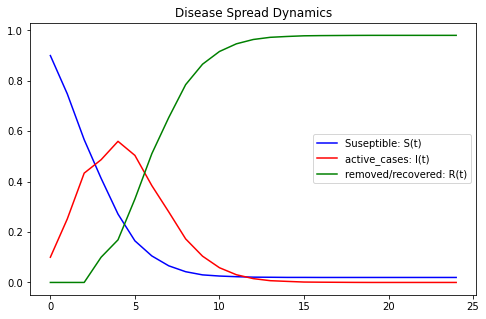

In [9]:
suseptible = np.zeros(25)
active_cases = np.zeros(25)
immunized_cases = np.zeros(25)
daily_new = np.zeros(25)
for k in range(50):
    model1 = Disease_spread1(100,Gr1,3,0)
    for i in range(25):
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        for agents in model1.schedule.agents:
            if agents.condition == '1':
                count1 = count1+1
            if agents.condition == '5':
                count2 = count2 + 1
            if agents.new == 1:
                count3 = count3+1
            if agents.condition == '0':
                count4 = count4+1
        active_cases[i] = active_cases[i] +count1
        immunized_cases[i] = immunized_cases[i] +count2
        suseptible[i] = suseptible[i]+count4
        if i > 0:
            daily_new[i] = suseptible[i-1] - suseptible[i]
        model1.step()
active_cases = active_cases/50
immunized_cases = immunized_cases/50
suseptible = suseptible/50
daily_new = daily_new/50
fig, ax = plt.subplots(figsize = (8,5))
plt.title('Disease Spread Dynamics')
pyplot.plot(suseptible/100,'b',label = 'Suseptible: S(t)')
pyplot.plot(active_cases/100,'r',label ='active_cases: I(t)')
pyplot.plot(immunized_cases/100,'g',label = 'removed/recovered: R(t)')
# pyplot.plot(daily_new,'y',label = 'daily_new')
pyplot.legend()
# pyplot.plot(lin,'r+')        

In [10]:
immunized_cases[1:]

array([ 0.  ,  0.  , 10.  , 16.9 , 33.1 , 51.06, 65.4 , 78.46, 86.58,
       91.62, 94.66, 96.38, 97.24, 97.58, 97.84, 97.92, 97.96, 98.  ,
       98.02, 98.02, 98.02, 98.02, 98.02, 98.02])

In [11]:
len(solution[:,2])

NameError: name 'solution' is not defined

In [12]:
t1=(t[0:25])

NameError: name 't' is not defined

In [13]:
import scipy as sci
from scipy.special import lambertw
import pandas as pd
from numpy.matlib import repmat 

In [14]:
def compute(R0,s0,r0):
    return 1+(1/R0)*lambertw(-R0*s0*np.exp(R0))

In [15]:
s = [0.9999,0.999,0.9,0.8,0.7,0.5,0.25]
r = [0,0,0,0.1,0.1,0.25,0.5]
R0 = [0.9,1.0001,1.01,1.05,2,2.001,2.01]
r_infi = []
for i in s:
    for k in R0:
        r_infi.append(compute(k,i,0))


In [16]:
(r_infi)

[(1.273220888865692+1.90371425332203j),
 (1.395012453564491+1.7880439981535685j),
 (1.405397989853855+1.7772860541397035j),
 (1.4448141405491302+1.7350150027051368j),
 (1.835904004209371+1.1084618532246437j),
 (1.8360696864160726+1.108045729691387j),
 (1.837550419474614+1.104315182597655j),
 (1.2724981239894153+1.9033321851302831j),
 (1.3943562548758948+1.7877309199737892j),
 (1.4047476761642568+1.7769787361802385j),
 (1.4441865048416584+1.7347293778596897j),
 (1.8355535665704816+1.1083790284198822j),
 (1.8357194057445767+1.1079629872104773j),
 (1.8372015447623555+1.1042331758029535j),
 (1.1889269026601046+1.857927662137841j),
 (1.3184791478657145+1.750580786537991j),
 (1.3295507790064476+1.7405167648219473j),
 (1.371610792091809+1.7008576236102375j),
 (1.795014938361994+1.0986110442775558j),
 (1.7951989184887658+1.0982047436458373j),
 (1.7968435463358954+1.09456197694788j),
 (1.0950630494829585+1.8038313865619324j),
 (1.2332508414506655+1.7064700200511123j),
 (1.2450858771949127+1.697

In [17]:
c1 = repmat(R0,len(R0),1).flatten()
c2 = repmat(s,len(R0),1).T.flatten()
data = {'s0' : c2,'R0' : c1}

In [18]:
df = pd.DataFrame(data)
df['r(infinity)'] = r_infi
df.head(5)

,s0,R0,r(infinity)
0,0.9999,0.9000,1.273221+1.903714j
1,0.9999,1.0001,1.395012+1.788044j
2,0.9999,1.0100,1.405398+1.777286j
3,0.9999,1.0500,1.444814+1.735015j
4,0.9999,2.0000,1.835904+1.108462j


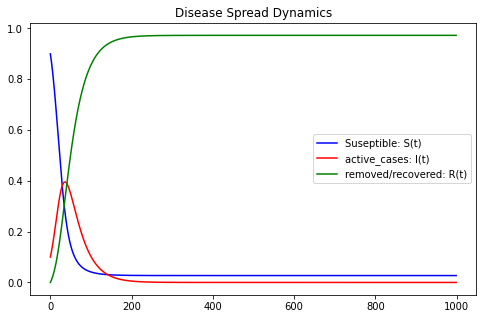

In [19]:
def SIR_model(inital_cond, t, beta, gamma):
    s,i,r = inital_cond
    
    ds_dt = -beta*s*i
    di_dt = beta*s*i - gamma*i
    dr_dt = gamma*i
    return [ds_dt,di_dt,dr_dt]
s0= 0.9
i0 = 1-s0
r0 = 0
beta = 1.2
gamma = 1/3
t = np.linspace(0,100,1000)
inital_cond = [s0 , i0, r0]
solution = scipy.integrate.odeint(SIR_model,inital_cond,t,args = (beta,gamma))
solution = np.array(solution)
fig, ax = plt.subplots(figsize = (8,5))
plt.title('Disease Spread Dynamics')
pyplot.plot(solution[:,0],'b',label = 'Suseptible: S(t)')
pyplot.plot(solution[:,1],'r',label ='active_cases: I(t)')
pyplot.plot(solution[:,2],'g',label = 'removed/recovered: R(t)')
# pyplot.plot(daily_new,'y',label = 'daily_new')
pyplot.legend()

In [20]:
print(solution[:,2][-1],solution[:,1][-1],solution[:,0][-1])

0.9728873455266369 -1.2503219998876607e-10 0.027112654598396183


In [21]:
s0= 0.9
i0 = 1-s0
r0 = 0
beta = 1.2
gamma = 1/3

In [22]:
def sir_compartmental(s0,i0,r0,beta,gamma):
    s = [s0]
    i = [i0]
    r = [r0]
    for k in range(len(t)-1):
        delta_t = t[k+1] - t[k]
        s_to_i = beta*s[-1]*i[-1]*(delta_t)
        i_to_r = i[-1]*gamma*(delta_t)
        
        s.append(s[-1]-s_to_i)
        i.append(i[-1]+s_to_i-i_to_r)
        r.append(r[-1]+i_to_r)
    fig, ax = plt.subplots(figsize = (8,5))
    plt.title('Disease Spread Dynamics')
    pyplot.plot(s,'b',label = 'Suseptible: S(t)')
    pyplot.plot(i,'r',label ='active_cases: I(t)')
    pyplot.plot(r,'g',label = 'removed/recovered: R(t)')
    # pyplot.plot(daily_new,'y',label = 'daily_new')
    pyplot.legend()
    print(r[-1],i[-1],s[-1])
    return s,i,r
s,i,r = sir_compartmental(s0,i0,r0,beta,gamma)

0.9745679699306691 1.0098230595368704e-13 0.025432030069230133


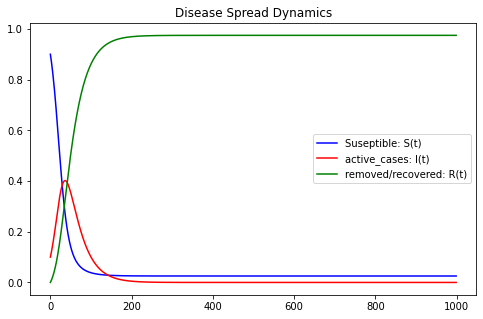

In [23]:
s,i,r = sir_compartmental(s0,i0,r0,beta,gamma)

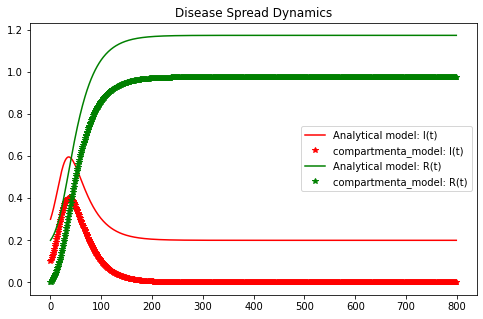

In [24]:
fig, ax = plt.subplots(figsize = (8,5))
plt.title('Disease Spread Dynamics')
pyplot.plot(solution[0:800,1]+0.2,'r',label ='Analytical model: I(t)')
pyplot.plot(i[0:800],'r*',label ='compartmenta_model: I(t)')
pyplot.plot(solution[0:800,2]+0.2,'g',label ='Analytical model: R(t)')
pyplot.plot(r[0:800],'g*',label ='compartmenta_model: R(t)')
# pyplot.plot(t,solution[:,0],'b',label ='Analytical model: S(t)')
# pyplot.plot(s,'b*',label ='compartmenta_model: S(t)')
# pyplot.plot(t,active_cases/100,'r*',label ='active_cases: I(t)')
# pyplot.plot(t,immunized_cases/100,'g*',label = 'removed/recovered: R(t)')
pyplot.legend()

In [25]:
solution[:,1]

array([ 0.1       ,  0.10768912,  0.11580939,  0.12435958,  0.13333406,
        0.14272226,  0.15250836,  0.16267081,  0.17318212,  0.18400865,
        0.19511062,  0.20644224,  0.21795199,  0.22958306,  0.24127405,
        0.25295971,  0.26457194,  0.27604085,  0.2872959 ,  0.29826715,
        0.30888644,  0.31908859,  0.32881252,  0.33800224,  0.34660768,
        0.35458539,  0.361899  ,  0.36851955,  0.37442556,  0.37960303,
        0.38404512,  0.38775189,  0.39072971,  0.39299075,  0.39455236,
        0.39543636,  0.39566836,  0.39527715,  0.39429395,  0.39275189,
        0.39068538,  0.38812962,  0.3851201 ,  0.38169226,  0.37788109,
        0.37372084,  0.36924482,  0.36448517,  0.35947271,  0.35423686,
        0.34880552,  0.34320507,  0.33746029,  0.33159443,  0.32562916,
        0.31958464,  0.31347956,  0.30733115,  0.3011553 ,  0.29496657,
        0.2887783 ,  0.28260263,  0.27645059,  0.27033217,  0.26425638,
        0.25823132,  0.25226424,  0.24636157,  0.24052905,  0.23

In [26]:
solution[:,0]

array([0.9       , 0.88884712, 0.87699935, 0.86444353, 0.85117103,
       0.83717841, 0.82246796, 0.80704828, 0.79093474, 0.7741499 ,
       0.75672365, 0.73869335, 0.72010371, 0.7010065 , 0.68146011,
       0.66152888, 0.64128218, 0.62079354, 0.60013945, 0.57939816,
       0.55864845, 0.53796833, 0.51743382, 0.49711784, 0.47708913,
       0.45741137, 0.43814251, 0.41933417, 0.40103133, 0.38327211,
       0.36608775, 0.34950279, 0.33353528, 0.31819717, 0.30349479,
       0.28942929, 0.27599723, 0.26319113, 0.25100004, 0.23941002,
       0.22840476, 0.21796597, 0.20807388, 0.19870761, 0.18984554,
       0.18146562, 0.17354565, 0.16606349, 0.15899724, 0.15232545,
       0.14602718, 0.14008214, 0.13447077, 0.12917425, 0.12417458,
       0.11945458, 0.11499789, 0.110789  , 0.10681321, 0.1030566 ,
       0.09950607, 0.09614925, 0.09297449, 0.08997085, 0.08712804,
       0.08443641, 0.08188689, 0.07947099, 0.07718075, 0.07500871,
       0.07294788, 0.07099172, 0.06913411, 0.06736929, 0.06569

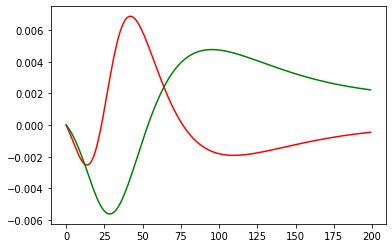

In [27]:
pyplot.plot(i[0:200]-solution[0:200,1],'r',label ='Difference anylaitics vs compartmental')
pyplot.plot(r[0:200]-solution[0:200,2],'g',label ='Difference anylaitics vs compartmental')

In [28]:
i

[0.09999999999999998,
 0.10747414080747413,
 0.115367343945171,
 0.12368116722343837,
 0.1324134127023514,
 0.14155764952454597,
 0.15110275662682207,
 0.16103250319150192,
 0.17132518667217317,
 0.18195334955265882,
 0.19288359642439826,
 0.20407653225946465,
 0.21548684071768795,
 0.2270635178315766,
 0.23875027143913238,
 0.250486090388139,
 0.2622059800668775,
 0.2738418526221848,
 0.28532355183112984,
 0.29657998461230073,
 0.30754032424594685,
 0.31813524513394015,
 0.3282981458793134,
 0.3379663169381366,
 0.3470820112118183,
 0.3555933805831962,
 0.36345524820124764,
 0.3706296947407118,
 0.37708644622881093,
 0.3828030606139769,
 0.38776491935101887,
 0.3919650382916121,
 0.39540371864662693,
 0.3980880634546692,
 0.4000313877589863,
 0.40125255163756257,
 0.40177524455577407,
 0.40162724751461487,
 0.4008396964941314,
 0.399446367092329,
 0.3974829963608344,
 0.39498665391972365,
 0.3919951707159018,
 0.38854663043038884,
 0.384678925638388,
 0.3804293784286568,
 0.3758344233

In [29]:
t

array([  0.        ,   0.1001001 ,   0.2002002 ,   0.3003003 ,
         0.4004004 ,   0.5005005 ,   0.6006006 ,   0.7007007 ,
         0.8008008 ,   0.9009009 ,   1.001001  ,   1.1011011 ,
         1.2012012 ,   1.3013013 ,   1.4014014 ,   1.5015015 ,
         1.6016016 ,   1.7017017 ,   1.8018018 ,   1.9019019 ,
         2.002002  ,   2.1021021 ,   2.2022022 ,   2.3023023 ,
         2.4024024 ,   2.5025025 ,   2.6026026 ,   2.7027027 ,
         2.8028028 ,   2.9029029 ,   3.003003  ,   3.1031031 ,
         3.2032032 ,   3.3033033 ,   3.4034034 ,   3.5035035 ,
         3.6036036 ,   3.7037037 ,   3.8038038 ,   3.9039039 ,
         4.004004  ,   4.1041041 ,   4.2042042 ,   4.3043043 ,
         4.4044044 ,   4.5045045 ,   4.6046046 ,   4.7047047 ,
         4.8048048 ,   4.9049049 ,   5.00500501,   5.10510511,
         5.20520521,   5.30530531,   5.40540541,   5.50550551,
         5.60560561,   5.70570571,   5.80580581,   5.90590591,
         6.00600601,   6.10610611,   6.20620621,   6.30

In [33]:
M = np.array([[0.65,0],[0,0.15]])
s0 = np.array([0.74,0.24])
i0 = np.array([0.01,0.01])
r0 = np.array([0,0])
# beta = 1.2
gamma =  np.array([1/5,1/5])
C = np.array([[(0.5*0.1),(0.5*0.3)],[(0.5*0.1),(0.5*0.3)]])

def sir_compartmental(M,s0,i0,r0,C):
    s = [s0]
    i = [i0]
    r = [r0]
    for k in range(len(t)-1):
        delta_t = np.array([t[k+1] - t[k],t[k+1] - t[k]])
        s_to_i = np.multiply(np.matmul(np.matmul(C,M),i[-1]),(delta_t))
        i_to_r = np.multiply(np.multiply(i[-1],gamma),(delta_t))
        
        s.append(s[-1]-s_to_i)
        i.append(i[-1]+s_to_i-i_to_r)
        r.append(r[-1]+i_to_r)
    fig, ax = plt.subplots(figsize = (8,5))
    plt.title('Disease Spread Dynamics')
    pyplot.plot(s,'b',label = 'Suseptible: S(t)')
    pyplot.plot(i,'r',label ='active_cases: I(t)')
    pyplot.plot(r,'g',label = 'removed/recovered: R(t)')
    pyplot.legend()
    print(r[-1],i[-1],s[-1])
    return s,i,r

[0.0137931 0.0137931] [0. 0.] [0.7362069 0.2362069]


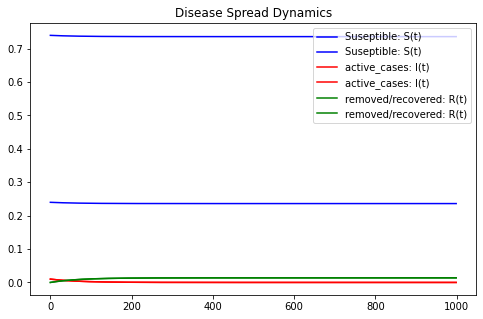

In [34]:
s,i,r = sir_compartmental(M,s0,i0,r0,C)

In [35]:
sum(r[-1])

0.027586194386070777

In [348]:
from scipy.special import lambertw

1+(1/2)*lambertw(-2*0.9*np.exp(-2))

(0.8282879716188433+0j)

In [353]:
r_infi_therotic= []
x_data = []
y_data = []
for beta in np.linspace(0.2, 1,num = 15):
    for gamma_inv in range(1,6,1):
        x_data.append(beta)
        y_data.append(gamma_inv)
        R0 = beta*gamma_inv
        r_infi_therotic.append(1+(1/R0)*lambertw(-R0*0.9*np.exp(-R0)))

In [379]:
x

array([[0.2       , 0.25714286, 0.31428571, 0.37142857, 0.42857143,
        0.48571428, 0.54285714, 0.6       , 0.65714286, 0.71428571,
        0.77142857],
       [0.2       , 0.25714286, 0.31428571, 0.37142857, 0.42857143,
        0.48571428, 0.54285714, 0.6       , 0.65714286, 0.71428571,
        0.77142857],
       [0.2       , 0.25714286, 0.31428571, 0.37142857, 0.42857143,
        0.48571428, 0.54285714, 0.6       , 0.65714286, 0.71428571,
        0.77142857],
       [0.2       , 0.25714286, 0.31428571, 0.37142857, 0.42857143,
        0.48571428, 0.54285714, 0.6       , 0.65714286, 0.71428571,
        0.77142857],
       [0.2       , 0.25714286, 0.31428571, 0.37142857, 0.42857143,
        0.48571428, 0.54285714, 0.6       , 0.65714286, 0.71428571,
        0.77142857]])

<IPython.core.display.Javascript object>


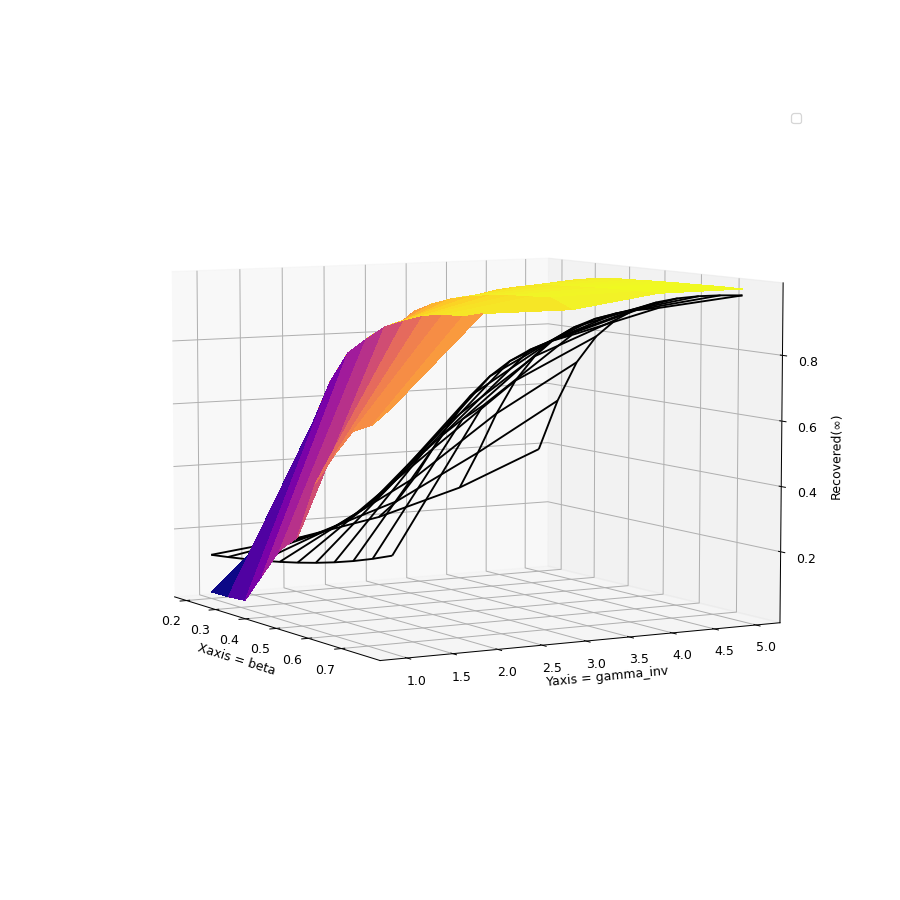

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [381]:
x = np.linspace(0.2, 0.77142857,num = 11)
y = range(1,6,1)
x,y = np.meshgrid(x, y)
r_infi_theorotic = np.real(1+(1/(x*y))*lambertw(-(x*y)*0.9*np.exp(-(x*y))))
x.shape

r_infi_simulator = np.array([[0.00234,0.00305,0.00788,0.1016,0.1950,0.24896,0.4267,0.52284,0.60648,0.63616,0.69834],[0.253,0.5383,0.67927,0.7794,0.8308,0.8774,0.90297,0.92578,0.93796,0.94045,0.95867],
                             [0.7093,0.8206,0.89,0.92178,0.94489,0.9598,0.9699,0.97752,0.98136,0.98603,0.95867],[0.8483,0.9147,0.9472,0.9639,0.97631,0.9826,0.98702,0.99029,0.99257,0.99402,0.996334],
                             [0.913,0.9532,0.9708,0.9813,0.9878,0.9905,0.99356,0.99564,0.99714,0.99892,0.99875]])
r_infi_simulator.shape
%matplotlib notebook

from mpl_toolkits import mplot3d
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
zline = r_infi_therotic
xline = x_data
yline = y_data
plt.xlabel('Xaxis = beta')
plt.ylabel('Yaxis = gamma_inv')
ax.set_zlabel('Recovered(∞)')
ax.plot_wireframe(x, y, r_infi_theorotic, color = 'black')
ax.plot_surface(x,y,r_infi_simulator, cmap  = cm.plasma,linewidth=0, antialiased=False)



In [373]:
s0 = np.linspace(0, 1,num = 20)
r_infi_theorotic1 = np.real(1+(1/(1.2))*lambertw(-(1.2)*s0*np.exp(-(1.2))))
plt.plot(s0,r_infi_theorotic1)

In [374]:
s0

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [375]:
r_infi_theorotic1

array([1.        , 0.98383721, 0.96701526, 0.94947014, 0.93112745,
       0.91189983, 0.89168374, 0.87035492, 0.84776231, 0.82371928,
       0.79799102, 0.77027543, 0.74017325, 0.70713866, 0.67039246,
       0.62875615, 0.5802959 , 0.52141746, 0.44379981, 0.31369833])

<IPython.core.display.Javascript object>


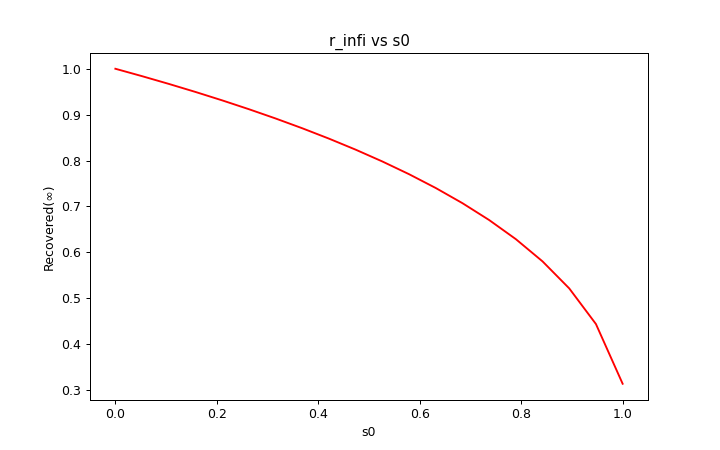

Text(0, 0.5, 'Recovered(∞)')

In [377]:
fig, ax = plt.subplots(figsize = (8,5))
plt.title('r_infi vs s0')
pyplot.plot(s0,r_infi_theorotic1,'r',label = 'Suseptible: S(t)')
plt.xlabel('s0')
plt.ylabel('Recovered(∞)')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from tensorflow.keras.datasets import mnist
# import pandas as pd

# creating custom layers
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train = x_train.reshape(-1,28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1,28*28).astype('float32') / 255.0
class Dense(layers.Layer):
    def __init__(self,units):
        super(Dense,self).__init__()
        self.units = units
    def build(self,input_shape):
        self.w = self.add_weight(
            name ='w',
            shape =(input_shape[-1],self.units),
            initializers = 'random_ normal',
            trainable = True
        )
        self.b = self.add_weight(
            name = 'b',
            shape = (self.units,),
            initializer = 'zeros',
            trainable = True
        )
    def call(self,inputs):
        return tf.matmul(inputs,self.w) + self.b

class MyModel(keras.Model):
    def __init__(self,num_classes =10):
        super(MyModel,self).__init__()
        self.dense1 = layers.Dense(64) # want to create this layers by ourselfs
        self.dense2 = layers.Dense(num_classes)
    def call(self,input_tensor):
        x = tf.nn.relu(self.dense1(input_tensor))
        return self.dense2(x)


model = MyModel()
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer= keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)
model.fit(x_train,y_train,batch_size = 32,epochs = 2,verbose =2 )
model.evaluate(x_test,y_test,batch_size=32,verbose = 2)